In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as mb
import lsst.sims.maf.plots as plots

from lsst.sims.utils import _healbin

from mafContrib import MicrolensingMetric, generateMicrolensingSlicer, generateTdePopSlicer, TdePopMetric
%matplotlib inline

/Users/yoachim/git_repos/sims_maf_contrib/mafContrib/transientAsciiSEDMetric.py:19: UserWarning: sncosmo not installed
  warnings.warn('sncosmo not installed')
/Users/yoachim/git_repos/sims_maf_contrib/mafContrib/LSSObsStrategy/artificialStructureCalculation.py:45: UserWarning: sympy not installed
  warnings.warn('sympy not installed')


In [2]:
dbs = ['baseline_nexp2_v1.6_10yrs.db', 'combo_dust_nexp2_v1.6_10yrs.db']

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fiveSigmaDepth', 'filter', 'observationStartMJD', 'night', 'fieldRA', 'fieldDec'].
Found 2064854 visits
Running:  ['baseline_nexp2_v1_6_10yrs_Fast_Microlensing_USER']
Completed metric generation.
Running:  ['baseline_nexp2_v1_6_10yrs_TDEsPopMetric_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" and note not like "DD%" for columns ['fiveSigmaDepth', 'fieldDec', 'fieldRA']
Found 434857 visits
Running:  ['baseline_nexp2_v1_6_10yrs_CoaddM5_r_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


Plotting complete.
Plotting figures with "filter = "r" and note not like "DD%"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 26.4886  dipole: lon: 113.009, lat: -70.9706, amp: 0.412172
  mono, lon, lat, amp


Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with no constraint for columns ['fiveSigmaDepth', 'filter', 'observationStartMJD', 'night', 'fieldRA', 'fieldDec'].
Found 2069774 visits
Running:  ['combo_dust_nexp2_v1_6_10yrs_Fast_Microlensing_USER']
Completed metric generation.
Running:  ['combo_dust_nexp2_v1_6_10yrs_TDEsPopMetric_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint filter = "r" and note not like "DD%" for columns ['fiveSigmaDepth', 'fieldDec', 'fieldRA']
Found 436310 visits
Running:  ['combo_dust_nexp2_v1_6_10yrs_CoaddM5_r_and_note_not_like_DD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')


Plotting complete.
Plotting figures with "filter = "r" and note not like "DD%"" constraint now.


/Users/yoachim/lsst/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/healpy/pixelfunc.py:1583: UserWarning: monopole: 26.2502  dipole: lon: 89.2451, lat: -77.7895, amp: 0.846709
  mono, lon, lat, amp


Plotting complete.


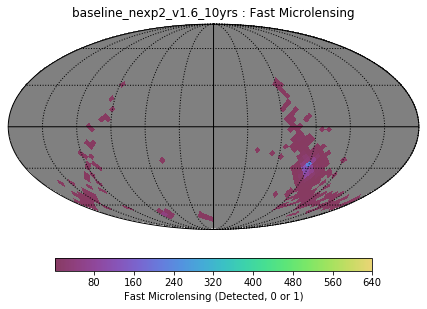

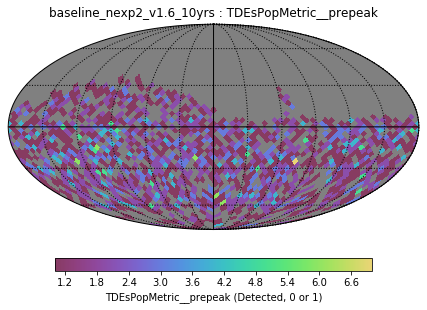

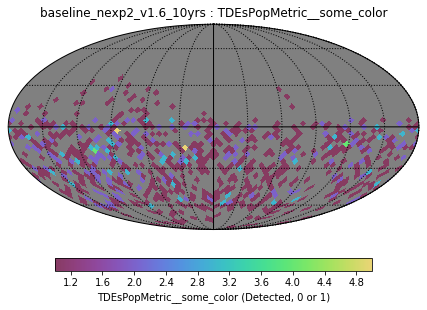

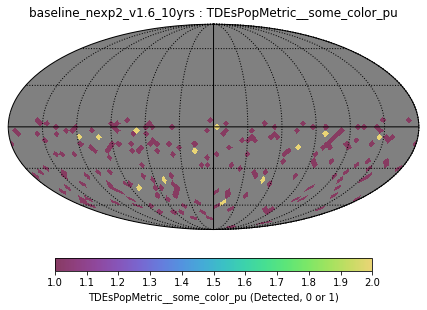

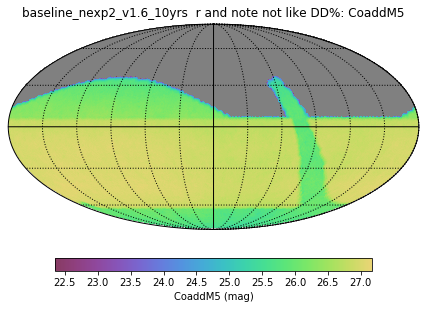

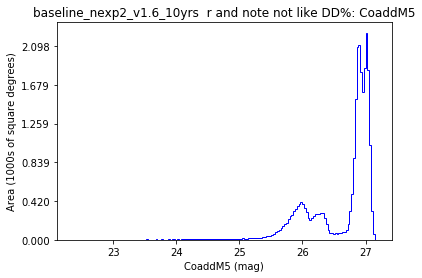

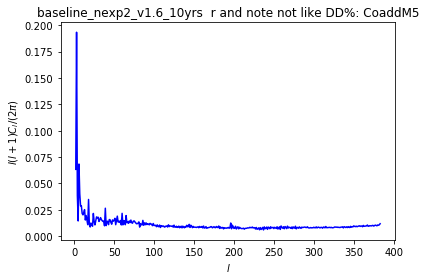

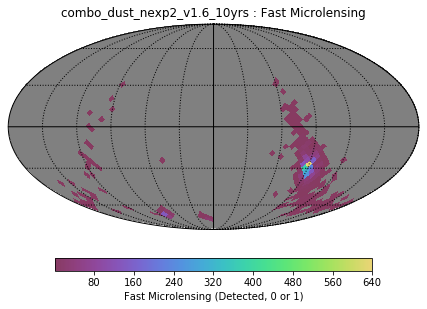

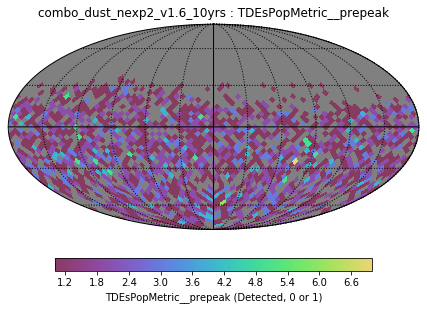

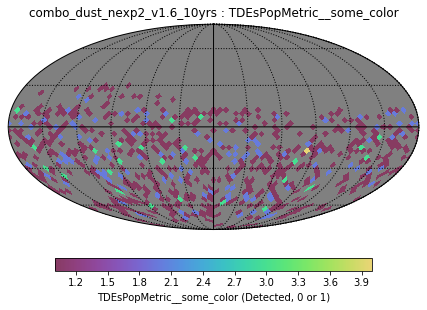

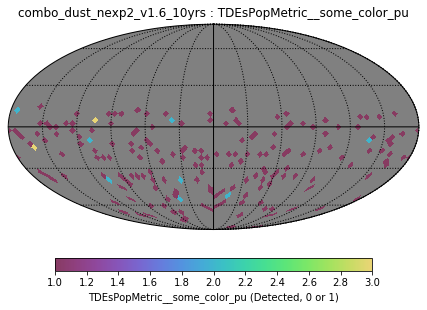

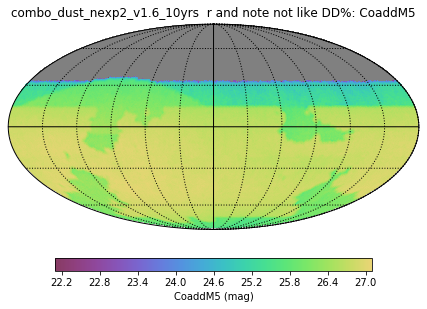

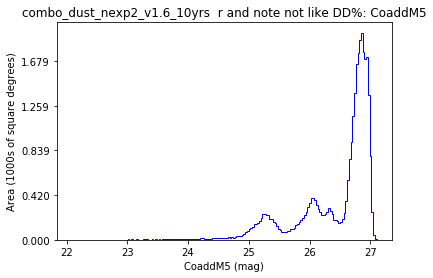

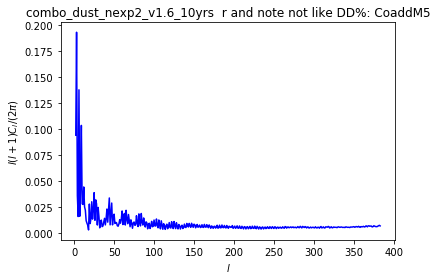

In [3]:
final_stats = []
for dbname in dbs:
    conn = db.OpsimDatabase(dbname)
    outDir='_static'
    resultsDb = db.ResultsDb(outDir=outDir)
    runName = dbname.replace('.db', '')
    
    bundleList = []
    sql = ''
    slicer = generateMicrolensingSlicer(min_crossing_time=1, max_crossing_time=10)
    metric = MicrolensingMetric(metricName='Fast Microlensing')
    plotDict = {'reduceFunc': np.sum, 'nside': 16, 'colorMin':1,
                'colorMax':640, 'maskBelow': 0}
    bundle = mb.MetricBundle(metric, slicer, sql, runName=runName,
                             summaryMetrics=[metrics.MeanMetric(maskVal=0)],
                             plotFuncs=[plots.HealpixSkyMap()],
                             plotDict=plotDict)
    bundleList.append(bundle)


    metric = TdePopMetric()
    slicer = generateTdePopSlicer()
    sql = ''
    plotDict = {'reduceFunc': np.sum, 'nside': 16, 'maskBelow': 0}
    plotFuncs = [plots.HealpixSkyMap()]
    bundle = mb.MetricBundle(metric, slicer, sql, runName=runName,
                             plotDict=plotDict, plotFuncs=plotFuncs,
                             summaryMetrics=[metrics.MeanMetric(maskVal=0)])
    bundleList.append(bundle)
    
    sql = 'filter = "r" and note not like "DD%"'
    metric = metrics.Coaddm5Metric()
    slicer = slicers.HealpixSlicer()
    bundle = mb.MetricBundle(metric, slicer, sql, runName=runName)
    bundleList.append(bundle)
    
    bd = mb.makeBundlesDictFromList(bundleList)
    bg = mb.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    bg.plotAll(closefigs=False)
    for key in bd:
        final_stats.append((runName, key, bd[key].metric.name, bd[key].summaryValues))

In [4]:
print(final_stats)

[('baseline_nexp2_v1.6_10yrs', 'baseline_nexp2_v1_6_10yrs_Fast_Microlensing_USER', 'Fast Microlensing', {'Mean': 0.1513}), ('baseline_nexp2_v1.6_10yrs', 'baseline_nexp2_v1_6_10yrs_TDEsPopMetric_USER', 'TDEsPopMetric', {}), ('baseline_nexp2_v1.6_10yrs', 'baseline_nexp2_v1_6_10yrs_CoaddM5_r_and_note_not_like_DD_HEAL', 'CoaddM5', {}), ('baseline_nexp2_v1.6_10yrs', 'TDEsPopMetric__prepeak', 'TDEsPopMetric__prepeak', {'Mean': 0.2431}), ('baseline_nexp2_v1.6_10yrs', 'TDEsPopMetric__some_color', 'TDEsPopMetric__some_color', {'Mean': 0.0948}), ('baseline_nexp2_v1.6_10yrs', 'TDEsPopMetric__some_color_pu', 'TDEsPopMetric__some_color_pu', {'Mean': 0.0204}), ('combo_dust_nexp2_v1.6_10yrs', 'combo_dust_nexp2_v1_6_10yrs_Fast_Microlensing_USER', 'Fast Microlensing', {'Mean': 0.3711}), ('combo_dust_nexp2_v1.6_10yrs', 'combo_dust_nexp2_v1_6_10yrs_TDEsPopMetric_USER', 'TDEsPopMetric', {}), ('combo_dust_nexp2_v1.6_10yrs', 'combo_dust_nexp2_v1_6_10yrs_CoaddM5_r_and_note_not_like_DD_HEAL', 'CoaddM5', {}), 

crossing time = 4.370861
peak time = 1365.162628
impact paramter = 0.729998


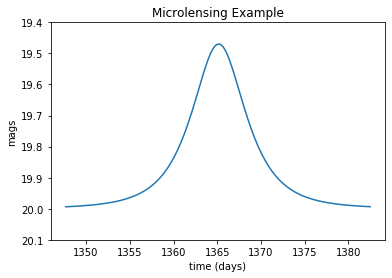

In [5]:
from mafContrib import MicrolensingMetric, generateMicrolensingSlicer, microlensing_amplification
i=0
slicer = generateMicrolensingSlicer(min_crossing_time=1, max_crossing_time=10)
pt = slicer.slicePoints['peak_time'][i]
ct = slicer.slicePoints['crossing_time'][i]
t = np.arange(pt-ct*4, pt+ct*4, .2)

amp = microlensing_amplification(t, impact_parameter=slicer.slicePoints['impact_parameter'][i],
                                crossing_time=ct,
                                 peak_time=pt)
plt.plot(t, 20-2.5*np.log10(amp))
plt.xlabel('time (days)')
plt.ylabel('mags')
plt.title('Microlensing Example')
plt.ylim([20.1, 19.4])
plt.savefig('_static/microlensing_lc.png')
print('crossing time = %f' % slicer.slicePoints['crossing_time'][i])
print('peak time = %f' % slicer.slicePoints['peak_time'][i])
print('impact paramter = %f' % slicer.slicePoints['impact_parameter'][i])

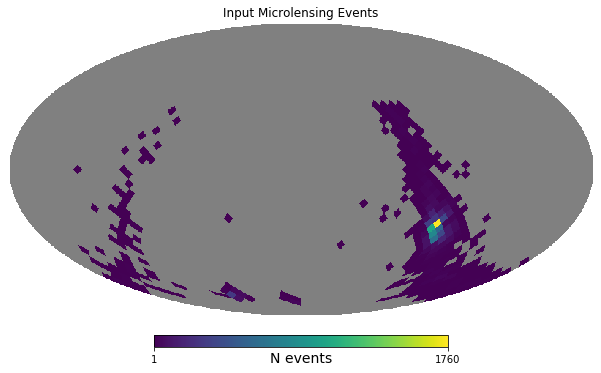

In [6]:
input_map = _healbin(slicer.slicePoints['ra'], slicer.slicePoints['dec'], slicer.slicePoints['dec']*0+1,
                    nside=16, reduceFunc=np.sum)
hp.mollview(input_map, title='Input Microlensing Events', unit='N events')
plt.savefig('_static/micro_input.png')

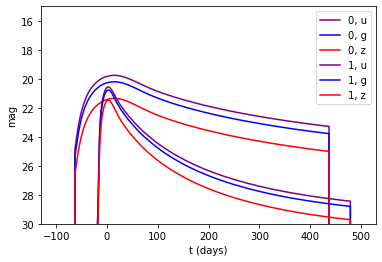

In [11]:
# let's plot up a few of the lightcurves
ivals=[0,1]
metric = TdePopMetric()
slicer = generateTdePopSlicer(seed=42)
for i in ivals:
    t = np.arange(-100, 500)
    lc = metric.lightcurves.interp(t, 'u', lc_indx=slicer.slicePoints['file_indx'][i])
    plt.plot(t, lc, color='purple', label='%i, u' % i)
    lc = metric.lightcurves.interp(t, 'g', lc_indx=slicer.slicePoints['file_indx'][i])
    plt.plot(t, lc, color='blue', label='%i, g' % i)
    lc = metric.lightcurves.interp(t, 'z', lc_indx=slicer.slicePoints['file_indx'][i])
    plt.plot(t, lc, color='red', label='%i, z' % i)
    
    
plt.ylim([30,15])
plt.xlabel('t (days)')
plt.ylabel('mag')
plt.legend()
plt.savefig('_static/tde_lc.png')

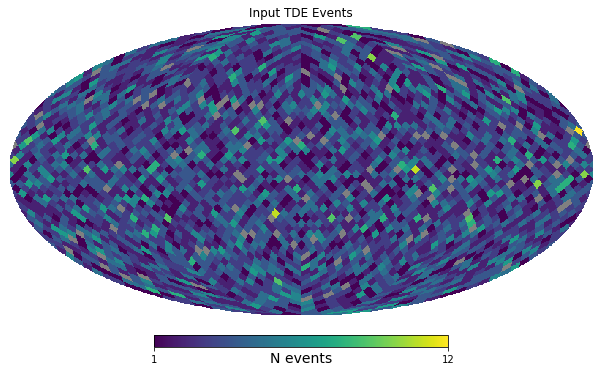

In [8]:
input_map = _healbin(slicer.slicePoints['ra'], slicer.slicePoints['dec'], slicer.slicePoints['dec']*0+1,
                    nside=16, reduceFunc=np.sum)
hp.mollview(input_map, title='Input TDE Events', unit='N events')
plt.savefig('_static/tde_input.png')